# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"
# dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2/lab"

dataDir = "/home/office/AV/DataSetExploration/data/ind/location-2/csv"

In [2]:
exec(open('init_notebook.py').read())

current working dir/home/office/AV/DataSetExploration/TTI-dataset-tools/src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
sceneId = 31
date = "2022-12-22"
fps=5
minYDisplacement = 3.5
maxXDisplacement = 6
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))

In [6]:
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed'
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)

In [7]:
pedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,18,22293,18334,31,6.0,4.619954,-0.097920,0.934893,0.978151,-0.319701,0.132384
1,18,22298,18334,31,6.0,4.425630,-0.286898,0.971621,0.944891,-0.183639,0.166300
2,18,22303,18334,31,6.0,4.219343,-0.470351,1.031439,0.917262,-0.299090,0.138144
3,18,22308,18334,31,6.0,4.003183,-0.650427,1.080800,0.900383,-0.246806,0.084396
4,18,22313,18334,31,6.0,3.773854,-0.818616,1.146641,0.840945,-0.329204,0.297186


In [8]:
# print(pedDf["uniqueTrackId"].unique())

In [9]:
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
pedDf.describe()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
count,481.000000,481.000000,481.000000,481.0,481.0,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,22.334719,9615.004158,22511.218295,31.0,6.0,0.680888,-0.105526,0.022548,0.057430,-0.007939,0.028814,1.287043,3.954197,1.530245
std,2.737513,7654.533684,2759.086196,0.0,0.0,2.436389,1.766208,0.816028,1.041107,0.251766,0.264703,0.306088,2.411703,0.879216
min,18.000000,10.000000,18334.000000,31.0,6.0,-4.008711,-3.128256,-1.607051,-1.709948,-1.418347,-1.216581,0.061354,0.000000,0.000000
25%,19.000000,3823.000000,19302.000000,31.0,6.0,-1.336165,-1.637402,-0.705164,-1.024109,-0.157156,-0.131916,1.142527,1.980357,0.839403
50%,23.000000,7363.000000,23077.000000,31.0,6.0,0.852045,-0.064480,-0.121145,0.597250,-0.016945,0.000642,1.299514,3.767909,1.485715
75%,24.000000,17564.000000,24129.000000,31.0,6.0,2.639597,1.305477,0.851186,0.900383,0.149094,0.178294,1.477061,5.956119,2.282143
max,29.000000,22431.000000,29431.000000,31.0,6.0,4.957891,3.091342,1.320176,1.547726,0.821041,1.193489,1.992478,8.628665,3.189262


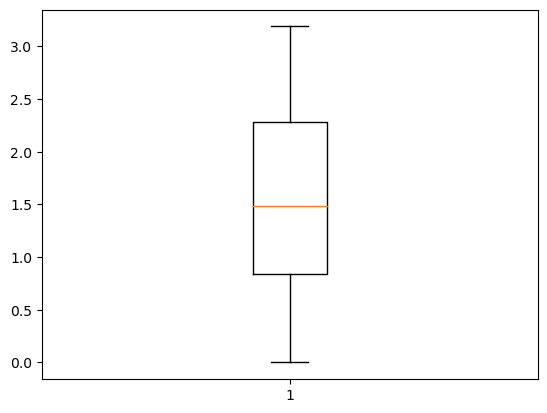

{'whiskers': [<matplotlib.lines.Line2D at 0x7f136b610850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f136b610d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f136b6105b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f136b61f280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f136b61f520>],
 'means': []}

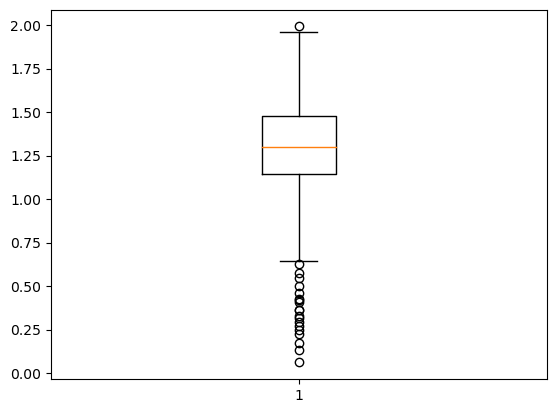

In [10]:
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

In [11]:
# outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=True, returnVals=True)
# outliers.index

In [12]:
# outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=False, returnVals=True)
# outliers

In [20]:
outliers = cleaner.getOutliersByYDisplacement(pedDf, byIQR=False, returnVals=True)
outliers

using min Y displacement (3.5)


,displacementY
uniqueTrackId,
18334,2.629489
19019,2.987619
19093,3.026099
19232,3.169422
19302,3.085947
21112,2.915563
21328,3.136112
21359,2.922766
22016,3.189262


In [29]:
ped19019 = pedDf[pedDf["uniqueTrackId"] == 19019]
firstRow = ped19019.iloc[0]
firstRow

recordingId              19.000000
frame                  1130.000000
uniqueTrackId         19019.000000
sceneId                  31.000000
roadWidth                 6.000000
sceneX                    1.747113
sceneY                    2.889699
sceneXVelocity           -0.797745
sceneYVelocity            0.923351
sceneXAcceleration       -0.055835
sceneYAcceleration       -0.066258
speed                     1.220235
displacementX             2.872841
displacementY             2.987619
Name: 18, dtype: float64

In [31]:
dX, dY = transformer.translateOneToLocalSource(ped19019)
print(list(zip(dX, dY)))

[(0.0, 0.0), (0.14978065563197673, -0.18044190560525442), (0.2905635698831368, -0.35685601404034983), (0.42819540366755016, -0.5341212346256055), (0.5584818657970358, -0.7057576351523682), (0.678662403251161, -0.8754648165479568), (0.7919863472297037, -1.0508742103133673), (0.8924844209515523, -1.2268209607187053), (0.9819747866000221, -1.404333457901588), (1.0654212420604225, -1.5842222020494483), (1.1329939935784306, -1.7524450118948647), (1.1927896165846512, -1.910300142534628), (1.2574418014989446, -2.061987363769009), (1.3321673237656042, -2.210486047002148), (1.4173329292974568, -2.3790971706992274), (1.5143344009164328, -2.5552507392232657), (1.6208229039833113, -2.7213581575241217), (1.7317366946654604, -2.878982131387603), (1.8474630387445465, -3.0332422042713243), (1.9664199347379183, -3.184755199739107), (2.08363625715751, -3.3332138534391413), (2.2021856372679145, -3.4804930762624533), (2.3165644998472374, -3.6287758844199107), (2.427575331166827, -3.7701552104535763), (2.5

In [28]:
ped19019.tail()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
54,19,1310,19019,31,6.0,4.949202,-2.798084,-0.093651,0.492557,-0.023562,0.358619,0.501381,0.329248,2.700164
55,19,1315,19019,31,6.0,4.957891,-2.881790,-0.043443,0.418530,-0.251041,0.370134,0.420779,0.337937,2.783870
56,19,1320,19019,31,6.0,4.950590,-2.947009,0.036508,0.326098,-0.399755,0.462163,0.328135,0.330635,2.849089
57,19,1325,19019,31,6.0,4.929987,-2.997521,0.103011,0.252557,-0.332514,0.367703,0.272757,0.310033,2.899601
58,19,1330,19019,31,6.0,4.902643,-3.032758,0.136720,0.176187,-0.168548,0.381849,0.223012,0.282689,2.934838


In [14]:
# print(len(outliers), 'vs', len(pedDf["uniqueTrackId"].unique()))

In [15]:
# outliers = cleaner.getOutliersByXDisplacement(pedDf, byIQR=False, returnVals=True)
# outliers

In [23]:
# cleanPedDf = cleaner.cleanBySpeed(pedDf, byIQR=True)
# cleanPedDf2 = cleaner.cleanBySpeed(pedDf, byIQR=False)
# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf2, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

using min Y displacement (3.5)


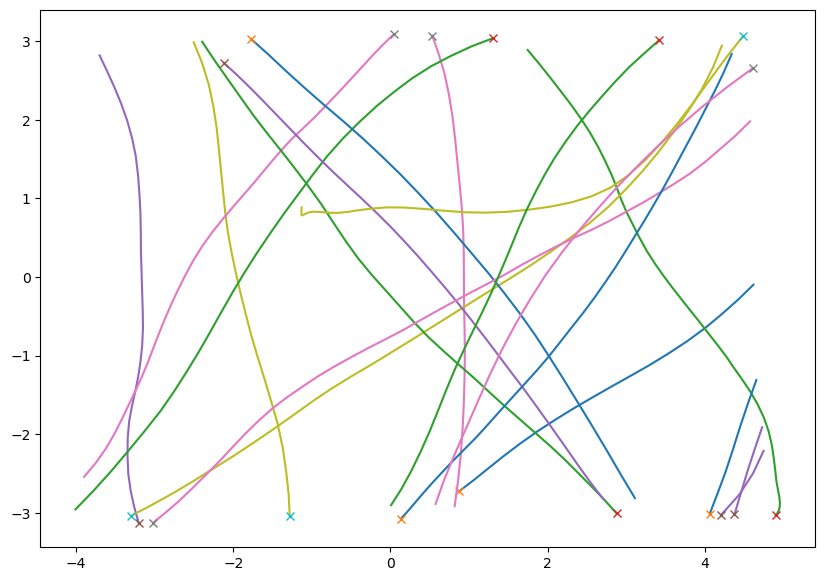

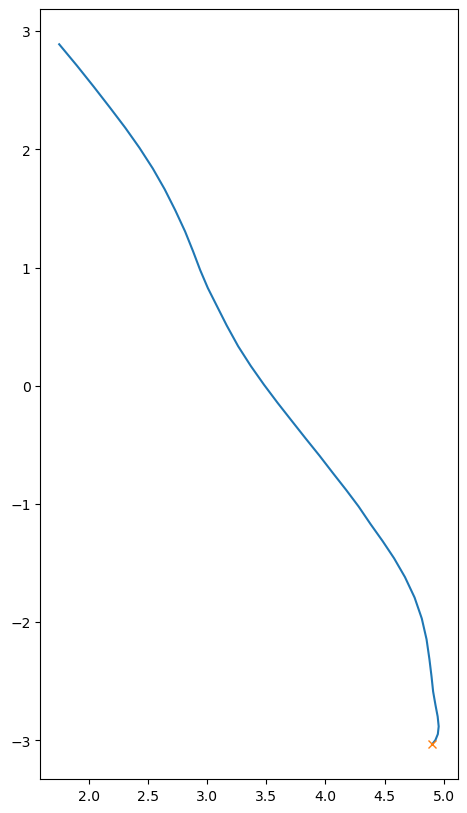

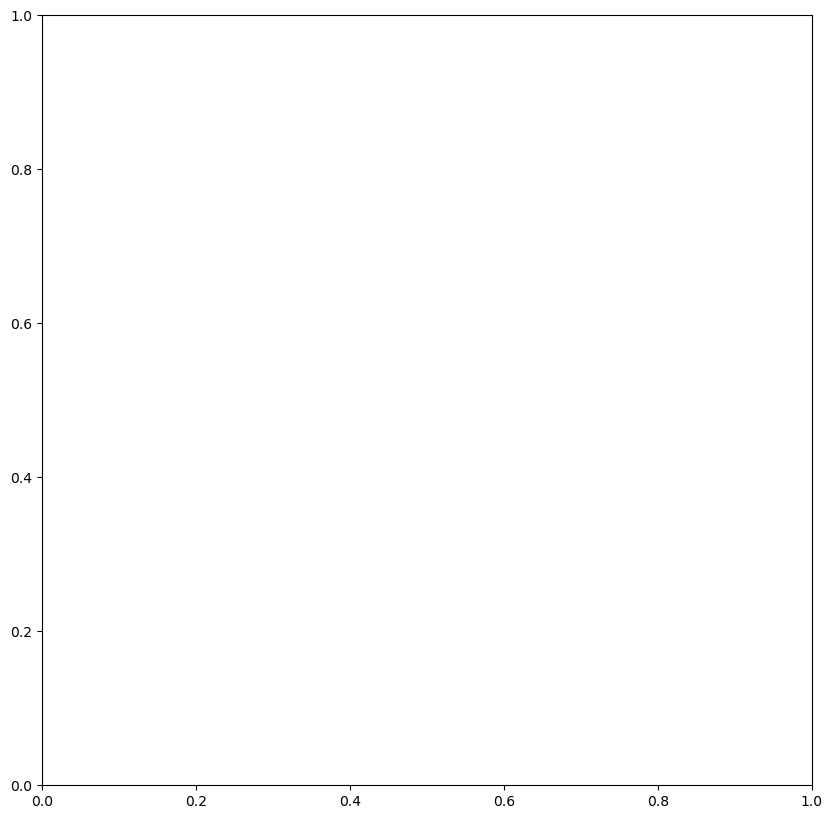

In [26]:
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY', trackIds=[19019])
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

In [18]:
allPedIds = list(cleanPedDf["uniqueTrackId"].unique())

In [19]:
transformer.translateAllToLocalSource(cleanPedDf)

ValueError: No objects to concatenate

In [ ]:
cleanPedDf.head()

In [ ]:
# trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"]==allPedIds[0]]
# visualizer.show(trackDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
# transformer.rotate(trackDf)
# visualizer.show(trackDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [ ]:
tracksMeta.head()

In [ ]:
southIds = []
for pedId in allPedIds:
    trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == pedId]
    trackMeta = tracksMeta[tracksMeta["uniqueTrackId"] == pedId].iloc[0]
    # print(trackMeta['verticalDirection'])
    if trackMeta['verticalDirection'] == "SOUTH":
        southIds.append(pedId)
        # print(trackMeta["uniqueTrackId"])
        X, Y = transformer.rotate180(trackDf)
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localX'] = X
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localY'] = Y

visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [ ]:
southPeds = cleanPedDf[cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(southPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
northPeds = cleanPedDf[~cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(northPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [ ]:
cleanPedDf[cleanPedDf["uniqueTrackId"] == southIds[0]].head(10)

In [ ]:
startingDf = cleanPedDf[cleanPedDf["displacementY"] < 1]

In [ ]:
startingDf.head(10)

In [ ]:
startingDf[["uniqueTrackId", "frame"]].groupby(["uniqueTrackId"]).count()

In [ ]:
startingDf[["uniqueTrackId", "frame"]]